<a href="https://colab.research.google.com/github/darshannegi/MNIST_Dataset-Project/blob/master/imorvemnistipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""

Loading and normalizing the CIFAR 10

^^^^^^^^^^^^^^^^^^^^^^^^^

Using Torchvision
"""



import torch

import torchvision



import matplotlib.pyplot as plt

import numpy as np

import torch.nn as nn

import torch.nn.functional as F






In [0]:
import torchvision.transforms.transforms as transforms
from torchvision import datasets

#number of subprocess used for data
num_workers = 0
# How many samples per load of the data
batch_size=20

#Convert data to Tensor
transform = transforms.ToTensor()
#Choosing training and testing dataset

train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)





0it [00:00, ?it/s]

9920512it [00:02, 4628591.88it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 124830.57it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2055040.52it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 45650.83it/s]            


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


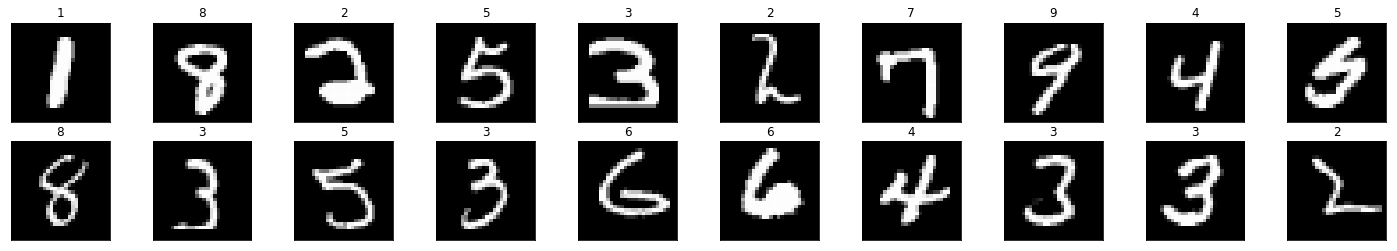

In [0]:
#See the outout of dataset images
import matplotlib.pyplot as plt
import numpy
%matplotlib inline

#Obtain one training batch at a time

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

#Plot the images in the batches, with corresponding labels

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
	ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
	ax.imshow(np.squeeze(images[idx]), cmap='gray')
	#print out the correct labels for each image
	#.item() gets the value contained  in  a Tensor
	ax.set_title(str(labels[idx].item()))

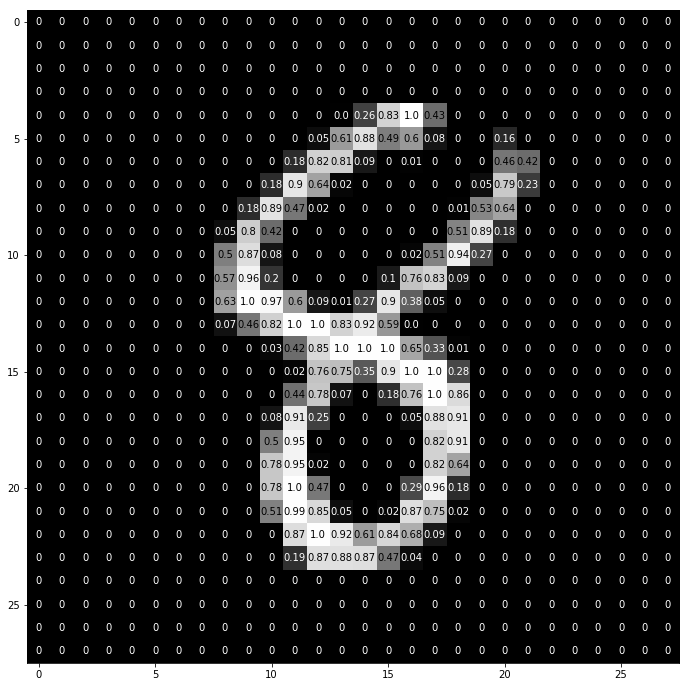

In [0]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax =fig.add_subplot(111)
ax.imshow(img, cmap='gray')	
width, height = img.shape
thresh =  img.max()/2.5

for x in range(width):
  for y in range(height):
    val =round(img[x][y],2) if img[x][y] !=0 else 0
    ax.annotate(str(val), xy=(y,x),
                horizontalalignment='center',
                verticalalignment='center',
                color='white' if img[x][y]<thresh else 'black')
                     
                    

In [0]:
#Deine a neural network
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [0]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)



In [0]:
# number of epochs to train the model
n_epochs = 5

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
             
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.034376
Epoch: 2 	Training Loss: 0.031891
Epoch: 3 	Training Loss: 0.030195
Epoch: 4 	Training Loss: 0.028925
Epoch: 5 	Training Loss: 0.027937


In [0]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.014611

Test Accuracy of     0: 99% (5919/5923)
Test Accuracy of     1: 99% (6722/6742)
Test Accuracy of     2: 99% (5937/5958)
Test Accuracy of     3: 99% (6105/6131)
Test Accuracy of     4: 99% (5833/5842)
Test Accuracy of     5: 99% (5410/5421)
Test Accuracy of     6: 99% (5908/5918)
Test Accuracy of     7: 99% (6246/6265)
Test Accuracy of     8: 99% (5820/5851)
Test Accuracy of     9: 99% (5924/5949)

Test Accuracy (Overall): 99% (59824/60000)


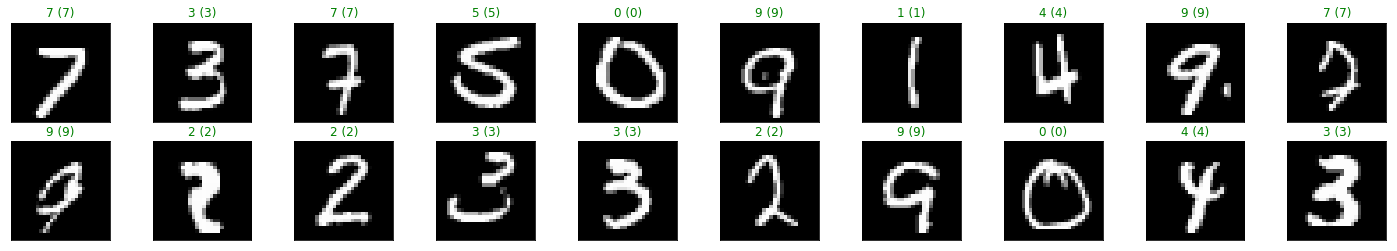

In [0]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))